In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import random

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#import helper_functions.py

In [41]:
from helper_functions import *

In [4]:
#get the directory of different styles

In [5]:
zhuan_image_path = glob.glob("zhuanshu\\*.jpg")
kai_image_path = glob.glob("kaishu\\*.jpg")
li_image_path = glob.glob("lishu\\*.jpg")
xing_image_path = glob.glob("xingshu\\*.jpg")
cao_image_path = glob.glob("caoshu\\*.jpg")

In [6]:
#shuffle

In [7]:
random.shuffle(zhuan_image_path)
random.shuffle(kai_image_path)
random.shuffle(xing_image_path)
random.shuffle(li_image_path)
random.shuffle(cao_image_path)

In [8]:
#split to test set 20% and train set 80% for each style

In [9]:
zhuan_test_path,zhuan_train_path = split_train_test_list(zhuan_image_path)
kai_test_path,kai_train_path = split_train_test_list(kai_image_path)
xing_test_path,xing_train_path = split_train_test_list(xing_image_path)
li_test_path,li_train_path = split_train_test_list(li_image_path)
cao_test_path,cao_train_path = split_train_test_list(cao_image_path)

In [10]:
#combine to one train set and one data set

In [11]:
all_test_path = zhuan_test_path + kai_test_path + xing_test_path+ li_test_path+cao_test_path
all_train_path = zhuan_train_path + kai_train_path + xing_train_path+ li_train_path+cao_train_path

In [12]:
img_train_ds = tf.data.Dataset.from_tensor_slices(all_train_path)
img_test_ds = tf.data.Dataset.from_tensor_slices(all_test_path)

In [13]:
#AUTOTUNE: process images parallelly

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
img_test_ds = img_test_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
img_train_ds = img_train_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [15]:
#classify different styles

In [16]:
label_to_index = {'kaishu': 0,  'lishu': 1,'xingshu': 2,'caoshu': 3,'zhuanshu': 4}
index_to_label = dict((v, k) for k, v in label_to_index.items())

In [17]:
#creat two lists for the class of each image

In [18]:
test_labels = [label_to_index.get(p.split('\\')[0]) for p in all_test_path]
train_labels = [label_to_index.get(p.split('\\')[0]) for p in all_train_path]

In [19]:
#convert to tf type

In [20]:
label_test_ds = tf.data.Dataset.from_tensor_slices(test_labels)
label_train_ds = tf.data.Dataset.from_tensor_slices(train_labels)

In [21]:
#create datasets

In [22]:
train_ds = tf.data.Dataset.zip((img_train_ds, label_train_ds))
test_ds = tf.data.Dataset.zip((img_test_ds, label_test_ds))

In [23]:
#batch

In [24]:
BATCH_SIZE = 16
train_ds = train_ds.repeat().shuffle(buffer_size=len(img_train_ds)).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [25]:
#model

In [26]:
model = tf.keras.Sequential([
             tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), 
                                    activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.GlobalAveragePooling2D(),
             tf.keras.layers.Dense(1024, activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Dense(5)    
]) 

In [27]:
#compile model

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc']
)


In [29]:
#two arguments for fit

In [30]:
steps_per_epoch = len(img_train_ds)//BATCH_SIZE
validation_steps = len(img_test_ds)//BATCH_SIZE

In [31]:
#fit

In [32]:
history = model.fit(train_ds, epochs=10, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=test_ds, 
                    validation_steps=validation_steps)

Epoch 1/10
875/875 [==============================] - 299s 229ms/step - loss: 0.8932 - acc: 0.7118 - val_loss: 1.1016 - val_acc: 0.7127
Epoch 2/10
875/875 [==============================] - 186s 212ms/step - loss: 0.5126 - acc: 0.8154 - val_loss: 0.8470 - val_acc: 0.7205
Epoch 3/10
875/875 [==============================] - 312s 357ms/step - loss: 0.4118 - acc: 0.8516 - val_loss: 0.7988 - val_acc: 0.7523
Epoch 4/10
875/875 [==============================] - 369s 421ms/step - loss: 0.3653 - acc: 0.8722 - val_loss: 0.4075 - val_acc: 0.8802
Epoch 5/10
875/875 [==============================] - 256s 292ms/step - loss: 0.3008 - acc: 0.8952 - val_loss: 0.5024 - val_acc: 0.8111
Epoch 6/10
875/875 [==============================] - 368s 420ms/step - loss: 0.2951 - acc: 0.8963 - val_loss: 0.3047 - val_acc: 0.8936
Epoch 7/10
875/875 [==============================] - 271s 310ms/step - loss: 0.2629 - acc: 0.9022 - val_loss: 0.3864 - val_acc: 0.8641
Epoch 8/10
875/875 [============================

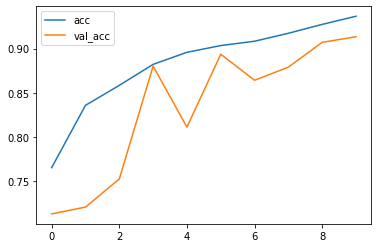

In [33]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

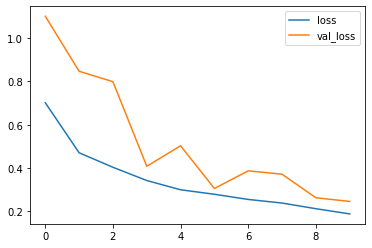

In [34]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

In [44]:
def test_image(path):
    test_tensor = load_and_preprocess_image(path)
    test_tensor = tf.expand_dims(test_tensor, axis=0)
    return model.predict(test_tensor)


In [52]:
a = test_image('D:\caligraphy\char\乌字\乌字 草书 王宠.jpg')

In [53]:
a


array([[-7.3535423, -1.9126395, -1.094583 ,  6.243654 ,  3.5415008]],
      dtype=float32)

In [54]:
index_to_label.get(np.argmax(a))

'caoshu'

In [55]:
model.save('imbalanced_data_model.h5')

In [56]:
model.save_weights('imbalanced_data_model_weights.h5')